In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
har = pd.read_csv('/content/drive/MyDrive/har_train.csv')

In [6]:
har.head(5)

,0.0,50.14042647165129,0.0595791008795918,0.0.1,0.4929442867229563,0.009664197285196,0.1499308054563939,0.0.2,35.19603401094712,3.268344213520224,...,0.3333333333333333.10,0.0476190476190476.11,0.0952380952380952.11,0.0.91,0.0.92,0.3809523809523809.11,0.3333333333333333.11,0.2857142857142857.11,0.238095238095238.11,Tennis
0,0.000000,39.458743,0.598236,0.0,0.537163,2.711785e-04,0.000274,-0.660429,143.137411,7.839429,...,0.333333,0.047619,0.095238,0.0,0.0,0.380952,0.333333,0.285714,0.238095,Sitting
1,0.000000,273.775013,0.306231,0.0,0.500422,7.866959e-01,0.011083,-217.358708,143.205373,59.754427,...,0.333333,0.047619,0.095238,0.0,0.0,0.380952,0.333333,0.285714,0.238095,Cycling
2,0.000000,-0.124842,0.058591,0.0,0.500000,8.599624e-36,0.045089,-8.708700,0.281777,0.445135,...,0.333333,0.047619,0.095238,0.0,0.0,0.380952,0.333333,0.285714,0.238095,Tennis
3,0.000000,50.004188,0.117917,0.0,0.469343,5.580454e-01,0.076807,-55.242511,44.912627,10.519441,...,0.333333,0.047619,0.095238,0.0,0.0,0.380952,0.333333,0.285714,0.238095,Football
4,0.952381,12.227189,0.126284,0.0,0.506998,6.158636e-02,0.009361,-164.901972,7.509582,41.755783,...,0.333333,0.047619,0.095238,0.0,0.0,0.380952,0.333333,0.285714,0.238095,Tennis


In [5]:
har.shape

(2441, 329)

In [7]:
har.columns

Index(['0.0', '50.14042647165129', '0.0595791008795918', '0.0.1',
       '0.4929442867229563', '0.009664197285196', '0.1499308054563939',
       '0.0.2', '35.19603401094712', '3.268344213520224',
       ...
       '0.3333333333333333.10', '0.0476190476190476.11',
       '0.0952380952380952.11', '0.0.91', '0.0.92', '0.3809523809523809.11',
       '0.3333333333333333.11', '0.2857142857142857.11',
       '0.238095238095238.11', 'Tennis'],
      dtype='object', length=329)

In [8]:
# checking for any missing values
missing = har.isnull().sum()

In [9]:
missing

,0
0.0,0
50.14042647165129,0
0.0595791008795918,0
0.0.1,0
0.4929442867229563,0
...,...
0.3809523809523809.11,0
0.3333333333333333.11,0
0.2857142857142857.11,0
0.238095238095238.11,0


In [10]:
har.isnull().sum().sum()

0

In [11]:
X = har.iloc[:, :-1]

In [12]:
class_names = np.unique(har['Tennis'])

In [13]:
class_names

array(['Cycling', 'Football', 'Jogging', 'JumpRope', 'Pushups', 'Sitting',
       'Swimming', 'Tennis', 'Walking', 'WalkingDownstairs',
       'WalkingUpstairs'], dtype=object)

In [14]:
# perfrom label encoding for the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(har['Tennis'])

In [15]:
for i, label in enumerate(le.classes_):
    print(f"Encoded value {i} corresponds to label {label}")

Encoded value 0 corresponds to label Cycling
Encoded value 1 corresponds to label Football
Encoded value 2 corresponds to label Jogging
Encoded value 3 corresponds to label JumpRope
Encoded value 4 corresponds to label Pushups
Encoded value 5 corresponds to label Sitting
Encoded value 6 corresponds to label Swimming
Encoded value 7 corresponds to label Tennis
Encoded value 8 corresponds to label Walking
Encoded value 9 corresponds to label WalkingDownstairs
Encoded value 10 corresponds to label WalkingUpstairs


<ipython-input-16-f852e33bb720>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


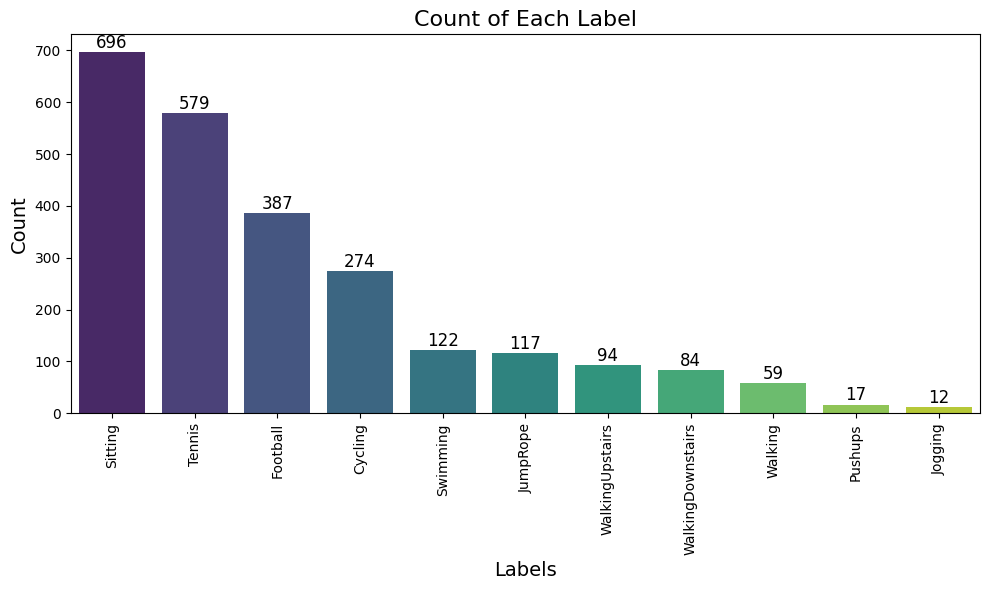

In [16]:
# plot the count of each label in the target data
label_counts = pd.Series(har['Tennis']).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Label', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# performing train, validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [19]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
X_train_scaled

array([[-4.46113437e-01,  1.49651860e-01,  4.11751218e-01, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17],
       [-4.46113437e-01,  1.60165859e-01, -1.09112270e+00, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17],
       [-4.46113437e-01, -5.05557340e-01, -1.06147304e+00, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17],
       ...,
       [-4.46113437e-01, -1.15682725e+00, -6.40904406e-01, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17],
       [-4.46113437e-01,  7.33368213e-01, -6.85906959e-01, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17],
       [-4.46113437e-01, -6.14941913e-01, -9.97055961e-01, ...,
         5.55111512e-17,  5.55111512e-17, -5.55111512e-17]])

In [22]:
X_test_scaled = scaler.transform(X_val)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
def evaluate(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Macro Averaged F1 Score:", macro_f1)
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    return accuracy, macro_f1

#### Support Vector Machine

In [25]:
svm_model = SVC(random_state = 42, class_weight = class_weight_dict)

In [26]:
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight={0: 0.8102947281029472, 1: 0.5742865548690791,
                  2: 17.745454545454546, 3: 1.8878143133462282,
                  4: 12.675324675324676, 5: 0.3185898482128285,
                  6: 1.8294283036551078, 7: 0.38327115648929905,
                  8: 3.7756286266924564, 9: 2.648575305291723,
                  10: 2.366060606060606},
    random_state=42)

In [27]:
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train_scaled))
print("Training Accuracy: ", train_accuracy)
train_precision = precision_score(y_train, svm_model.predict(X_train_scaled), average = "macro")
print("Training Precision: ", train_precision)
train_recall = recall_score(y_train, svm_model.predict(X_train_scaled), average = "macro")
print("Training Recall: ", train_recall)
train_f1score = f1_score(y_train, svm_model.predict(X_train_scaled), average = "macro")
print("Training Recall: ", train_f1score)

Training Accuracy:  0.8780737704918032
Training Precision:  0.9167561039816469
Training Recall:  0.9376726858810728
Training Recall:  0.9207843744995844


Accuracy: 0.7177914110429447
Macro Averaged F1 Score: 0.5852633262153678
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        55
           1       0.49      0.87      0.62        78
           2       0.00      0.00      0.00         2
           3       0.67      0.43      0.53        23
           4       1.00      0.67      0.80         3
           5       0.98      0.91      0.95       139
           6       0.57      0.84      0.68        25
           7       0.83      0.51      0.63       116
           8       1.00      0.83      0.91        12
           9       0.24      0.24      0.24        17
          10       0.27      0.21      0.24        19

    accuracy                           0.72       489
   macro avg       0.63      0.58      0.59       489
weighted avg       0.76      0.72      0.72       489



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


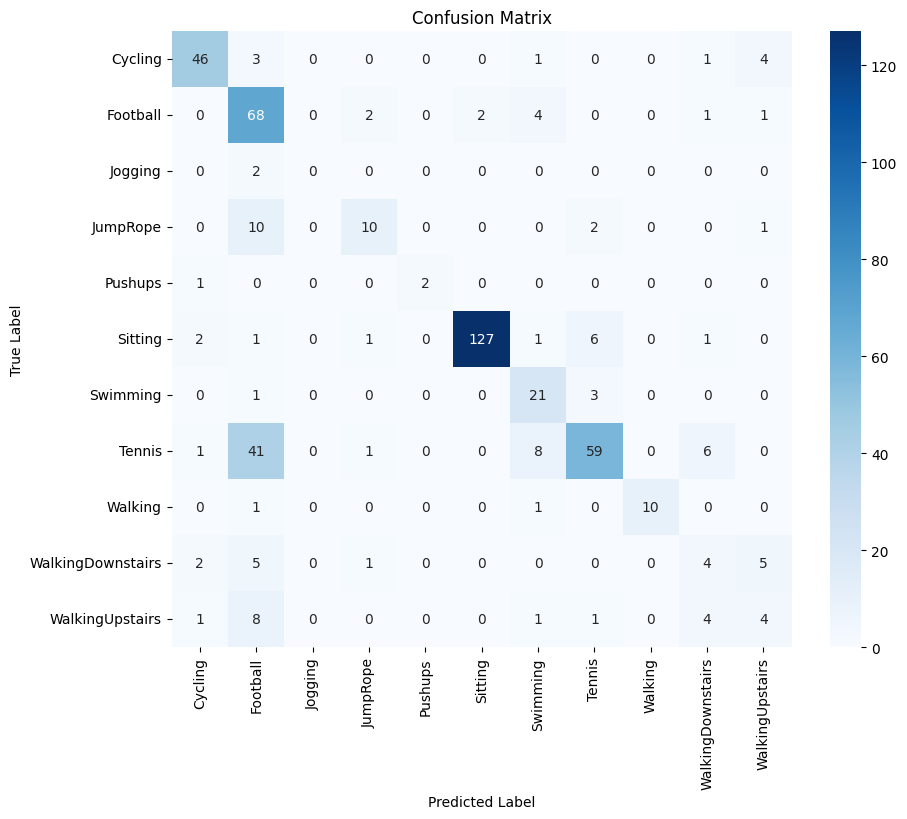

(0.7177914110429447, 0.5852633262153678)

In [28]:
evaluate(svm_model, X_test_scaled, y_val, class_names)

#### XGBoost Model

In [29]:
import xgboost as xgb

In [51]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    scale_pos_weight=class_weight_dict,
    eval_metric = 'mlogloss',
    learning_rate=0.1,
    n_estimators = 200,
    max_depth = 20,
    random_state=42
)

In [52]:
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train)], verbose = True)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:15:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.00477
[1]	validation_0-mlogloss:1.73581
[2]	validation_0-mlogloss:1.52716
[3]	validation_0-mlogloss:1.35766
[4]	validation_0-mlogloss:1.21438
[5]	validation_0-mlogloss:1.09211
[6]	validation_0-mlogloss:0.98625
[7]	validation_0-mlogloss:0.89405
[8]	validation_0-mlogloss:0.81226
[9]	validation_0-mlogloss:0.73961
[10]	validation_0-mlogloss:0.67454
[11]	validation_0-mlogloss:0.61636
[12]	validation_0-mlogloss:0.56353
[13]	validation_0-mlogloss:0.51639
[14]	validation_0-mlogloss:0.47385
[15]	validation_0-mlogloss:0.43521
[16]	validation_0-mlogloss:0.39999
[17]	validation_0-mlogloss:0.36819
[18]	validation_0-mlogloss:0.33934
[19]	validation_0-mlogloss:0.31296
[20]	validation_0-mlogloss:0.28878
[21]	validation_0-mlogloss:0.26667
[22]	validation_0-mlogloss:0.24681
[23]	validation_0-mlogloss:0.22852
[24]	validation_0-mlogloss:0.21177
[25]	validation_0-mlogloss:0.19643
[26]	validation_0-mlogloss:0.18256
[27]	validation_0-mlogloss:0.16968
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [53]:
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train_scaled))
print("Training Accuracy: ", train_accuracy)
train_precision = precision_score(y_train, xgb_model.predict(X_train_scaled), average = "macro")
print("Training Precision: ", train_precision)
train_recall = recall_score(y_train, xgb_model.predict(X_train_scaled), average = "macro")
print("Training Recall: ", train_recall)
train_f1score = f1_score(y_train, xgb_model.predict(X_train_scaled), average = "macro")
print("Training Recall: ", train_f1score)

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training Recall:  1.0


Accuracy: 0.8139059304703476
Macro Averaged F1 Score: 0.7019562585781708
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.72      0.83      0.77        78
           2       1.00      1.00      1.00         2
           3       1.00      0.65      0.79        23
           4       1.00      0.33      0.50         3
           5       0.98      0.98      0.98       139
           6       0.68      0.76      0.72        25
           7       0.76      0.78      0.77       116
           8       0.60      0.75      0.67        12
           9       0.36      0.24      0.29        17
          10       0.45      0.26      0.33        19

    accuracy                           0.81       489
   macro avg       0.77      0.68      0.70       489
weighted avg       0.81      0.81      0.81       489



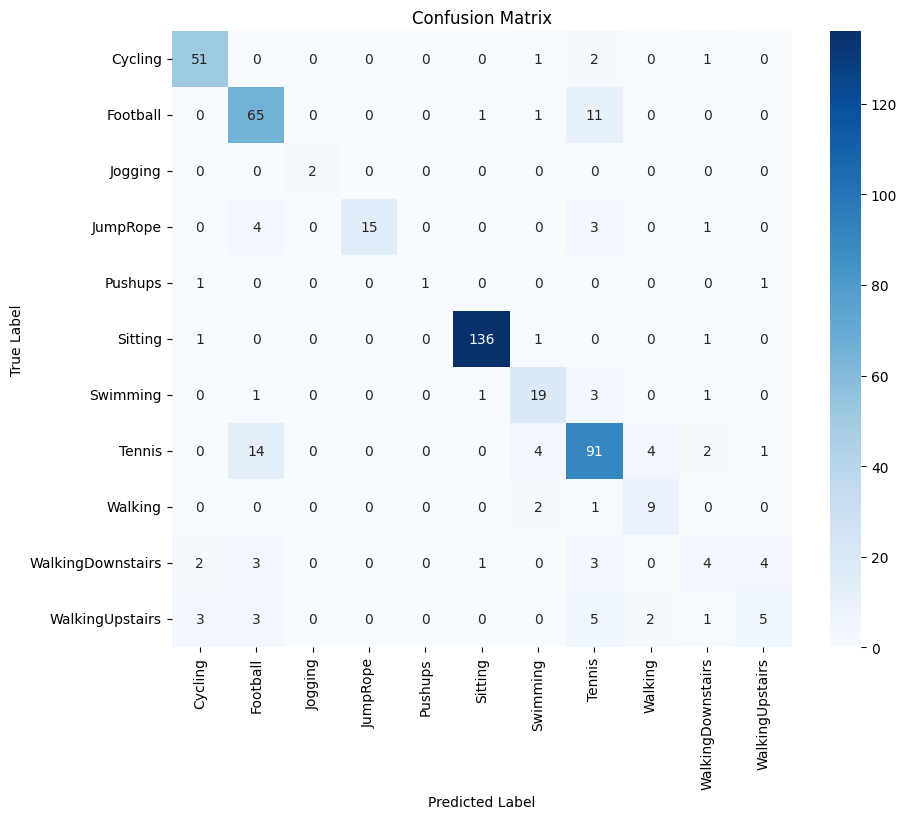

(0.8139059304703476, 0.7019562585781708)

In [54]:
evaluate(xgb_model, X_test_scaled, y_val, class_names)

#### Voting Classifier combining SVM and XGBoost Models

Validation Results:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:18:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8323108384458078
Macro Averaged F1 Score: 0.7403136279096809
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.70      0.88      0.78        78
           2       1.00      1.00      1.00         2
           3       0.88      0.65      0.75        23
           4       1.00      0.33      0.50         3
           5       0.99      0.99      0.99       139
           6       0.79      0.76      0.78        25
           7       0.79      0.78      0.78       116
           8       0.85      0.92      0.88        12
           9       0.60      0.35      0.44        17
          10       0.45      0.26      0.33        19

    accuracy                           0.83       489
   macro avg       0.81      0.72      0.74       489
weighted avg       0.83      0.83      0.82       489



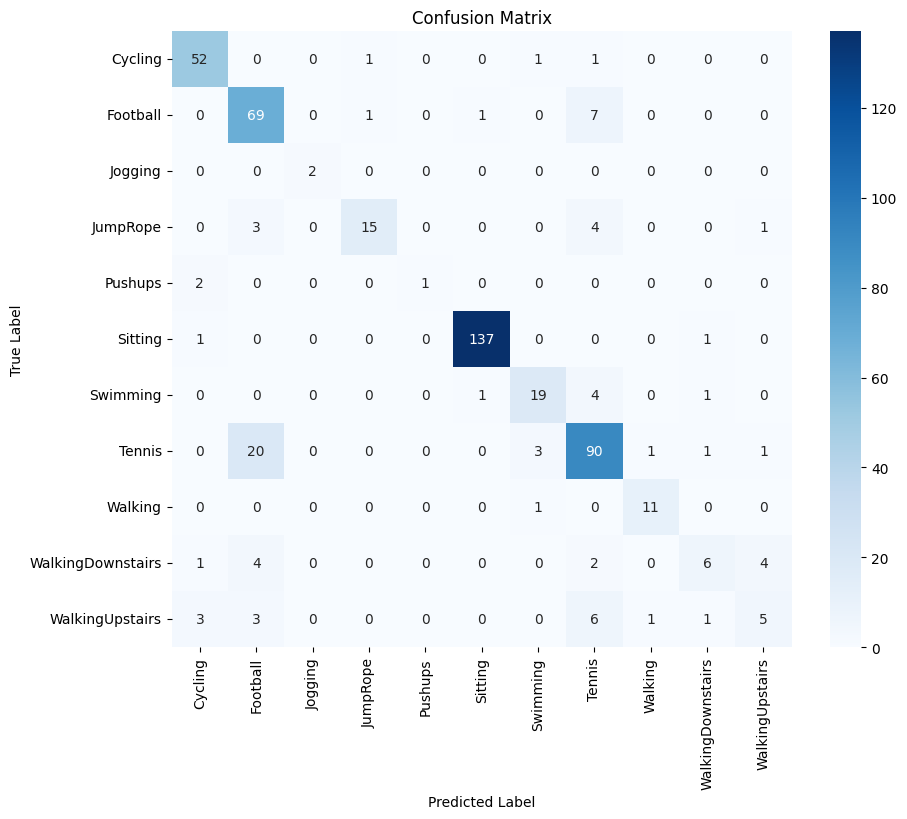

(0.8323108384458078, 0.7403136279096809)

In [55]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

svm = SVC(probability=True, C = 1.0, random_state=42, gamma = 'scale', kernel = 'rbf', class_weight = class_weight_dict)

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    scale_pos_weight=class_weight_dict,
    eval_metric = 'mlogloss',
    learning_rate=0.1,
    n_estimators = 200,
    max_depth = 10,
    random_state=42,
    reg_lambda=1.0, #regularization to prevent over-fitting
    reg_alpha=0.0
)

voting_clf = VotingClassifier(
    estimators=[('svm', svm), ('xgboost', xgb_model)],
    voting='soft'
)


print("Validation Results:")
voting_clf.fit(X_train_scaled, y_train)
evaluate(voting_clf, X_test_scaled, y_val, class_names)

In [57]:
print("Training Results:")
train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train_scaled))
print("Training Accuracy: ", train_accuracy)
train_precision = precision_score(y_train, voting_clf.predict(X_train_scaled), average = "macro")
print("Training Precision: ", train_precision)
train_recall = recall_score(y_train, voting_clf.predict(X_train_scaled), average = "macro")
print("Training Recall: ", train_recall)
train_f1score = f1_score(y_train, voting_clf.predict(X_train_scaled), average = "macro")
print("Training F1-score: ", train_f1score)

Training Results:
Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1-score:  1.0


Now, this Voting Classifier is trained on the
entire train data

In [61]:
X = har.iloc[:, :-1]
y = har.iloc[:, -1]

In [65]:
from sklearn.preprocessing import LabelEncoder
import joblib
label_enc = LabelEncoder()
label_enc.fit(y)
y_encoded = label_enc.transform(y)
joblib.dump(label_enc, 'label_encoder_task2.pkl')

['label_encoder_task2.pkl']

In [66]:
y_encoded

array([ 5,  0,  7, ..., 10,  7,  6])

In [67]:
vclf = VotingClassifier(
    estimators=[('svm', svm), ('xgboost', xgb_model)],
    voting='soft')

In [68]:
from sklearn.pipeline import Pipeline
import joblib
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', vclf)
])

# Train the pipeline
pipeline.fit(X, y_encoded)

# Save the entire pipeline
joblib.dump(pipeline, "pipeline_task2.pkl")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:29:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


['pipeline_task2.pkl']

In [69]:
train_accuracy = accuracy_score(y_encoded, pipeline.predict(X))
print("Training Accuracy: ", train_accuracy)
train_precision = precision_score(y_encoded, pipeline.predict(X), average = "macro")
print("Training Precision: ", train_precision)
train_recall = recall_score(y_encoded, pipeline.predict(X), average = "macro")
print("Training Recall: ", train_recall)
train_f1score = f1_score(y_encoded, pipeline.predict(X), average = "macro")
print("Training Recall: ", train_f1score)

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training Recall:  1.0
